<a href="https://colab.research.google.com/github/AnshumanDec2K/ML_Model_implementation/blob/main/naive_bayes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook contains implementation of "Naive Bayes"

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
wine_df = pd.read_csv('wine.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [ ]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [ ]:
wine_df.head(10)  #let us look at the raw data. As is evident, there are lot of missing values 

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [ ]:
wine_df.shape

(178, 14)

In [ ]:
wine_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cultivator            178 non-null    int64  
 1   Alchol                178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_of_Ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Falvanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280                 178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


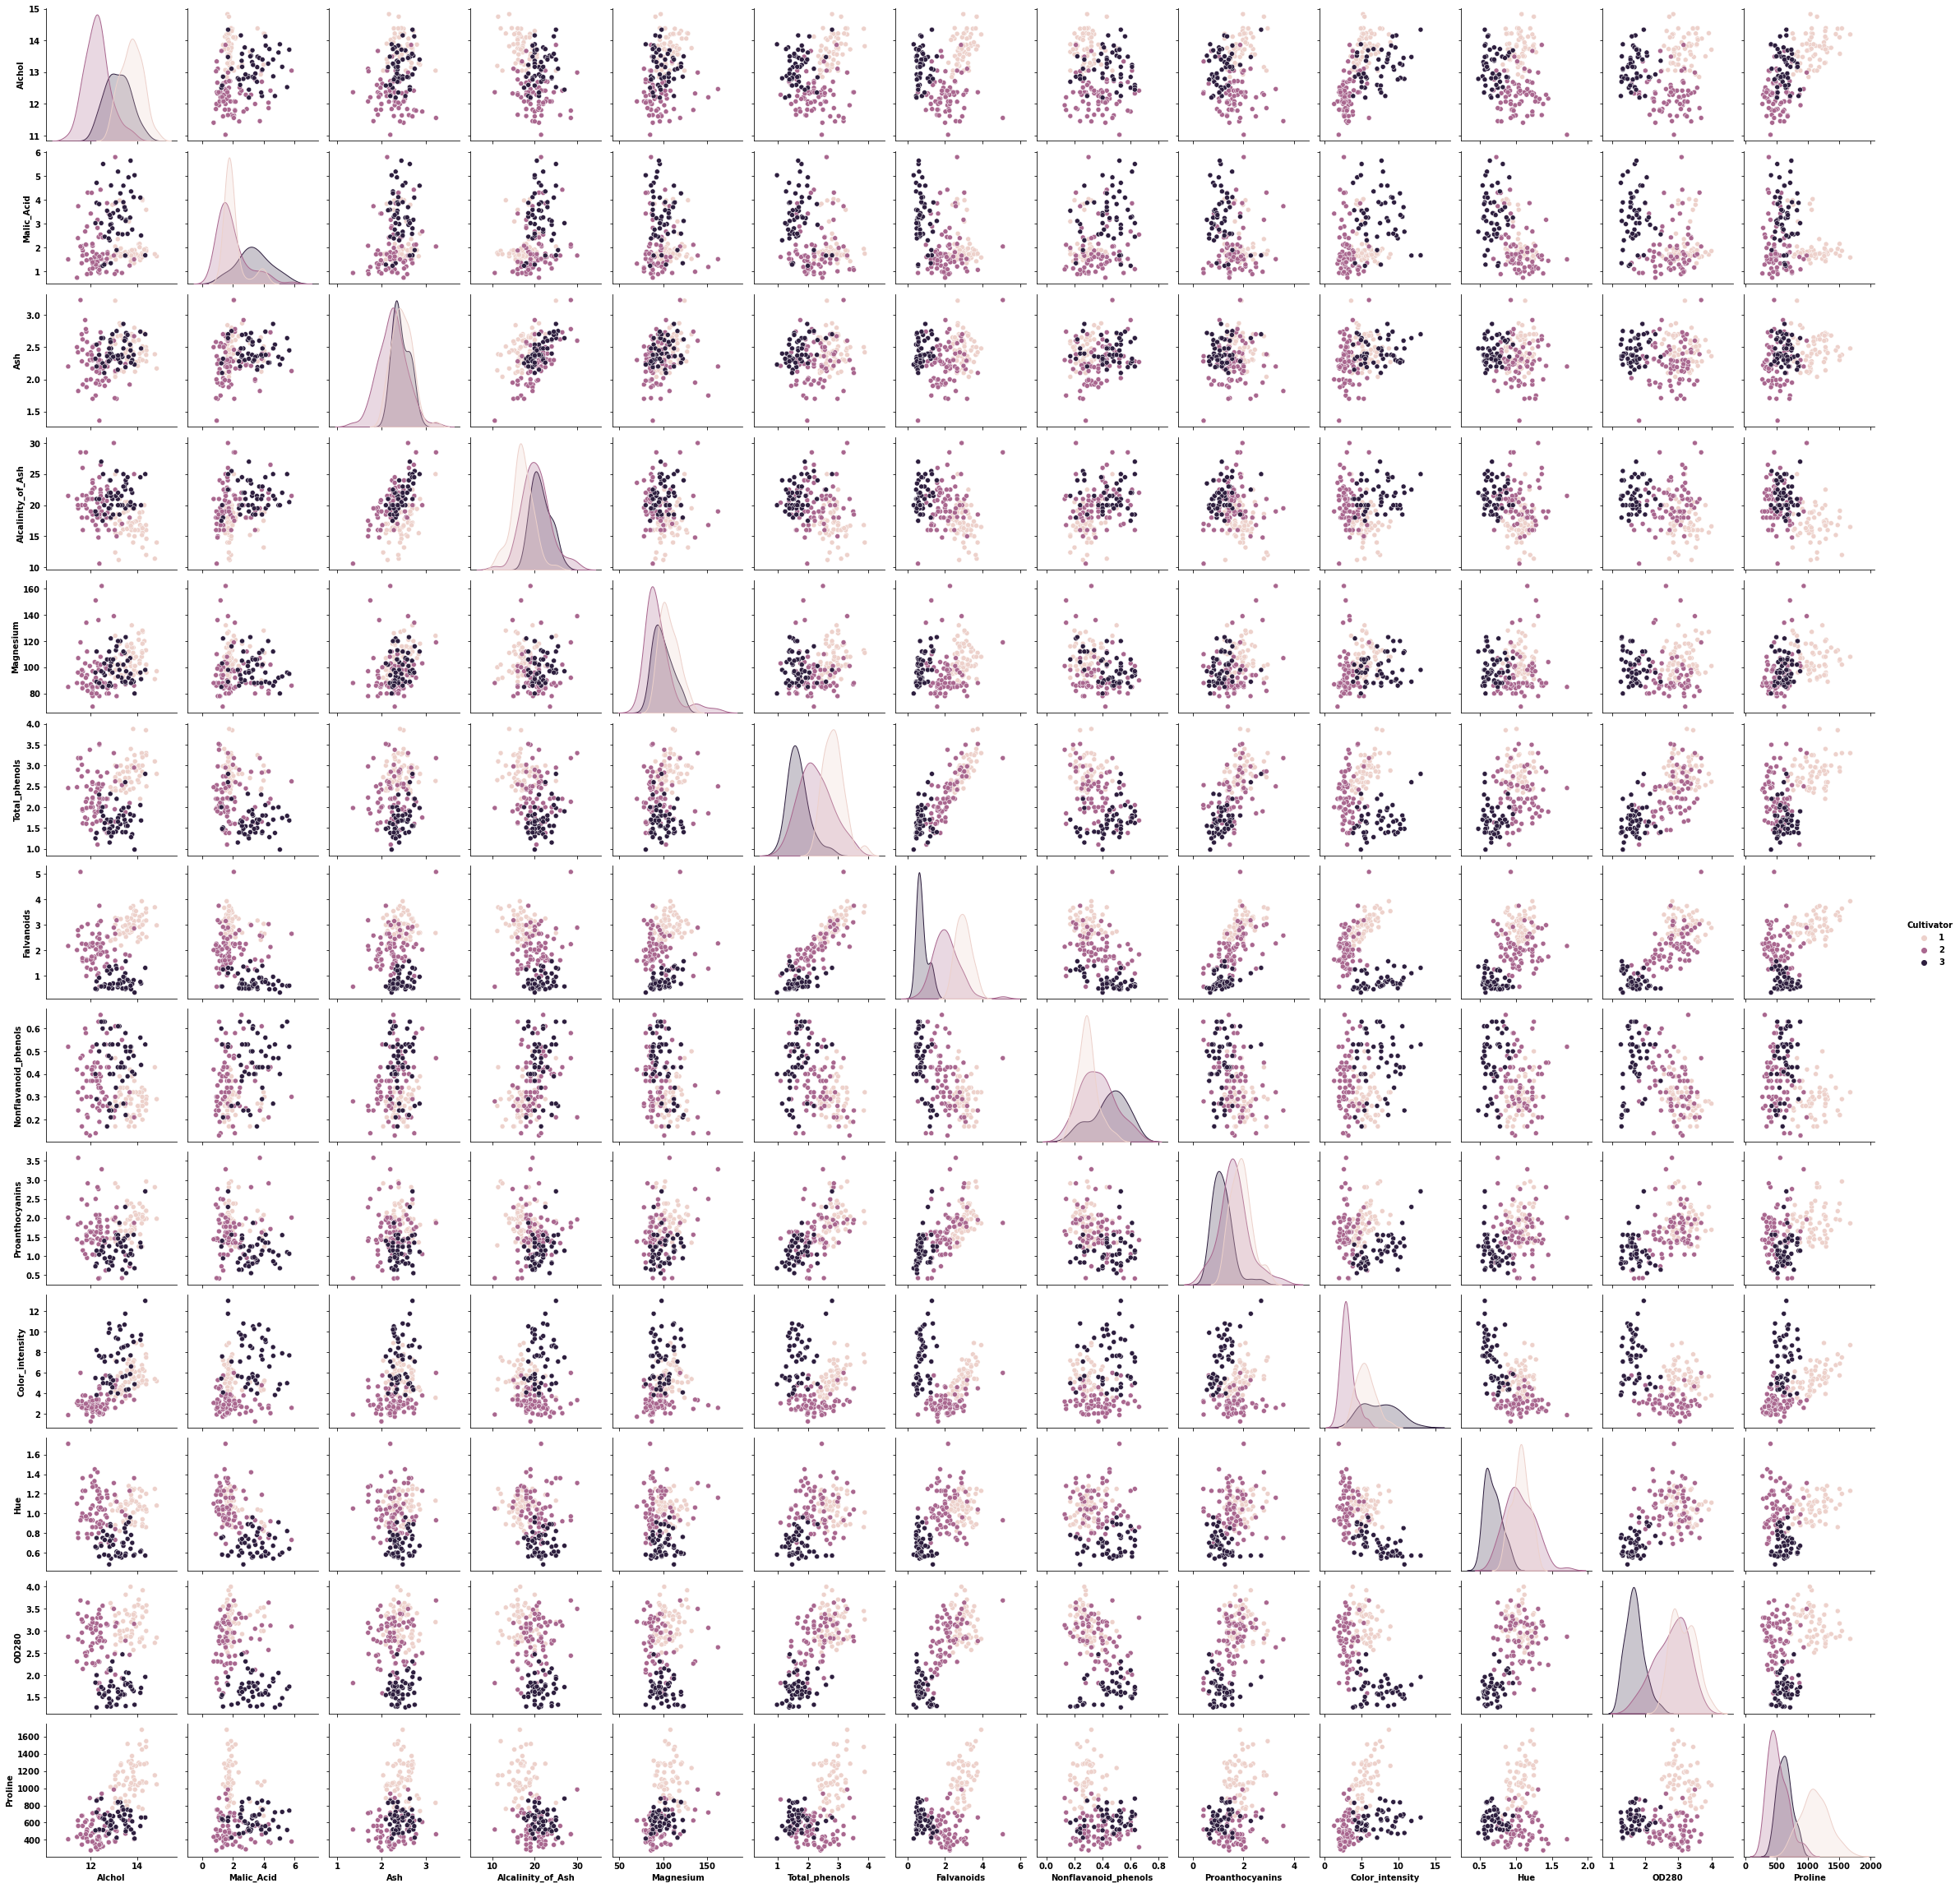

In [ ]:
import seaborn as sns
sns.pairplot(wine_df , diag_kind = "kde", hue="Cultivator")

In [ ]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X =  wine_df.drop("Cultivator", axis=1)
y =  wine_df.pop("Cultivator")

In [ ]:
X.head()

,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X.dtypes

Alchol                  float64
Malic_Acid              float64
Ash                     float64
Alcalinity_of_Ash       float64
Magnesium                 int64
Total_phenols           float64
Falvanoids              float64
Nonflavanoid_phenols    float64
Proanthocyanins         float64
Color_intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [ ]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(train_set, train_labels)

GaussianNB()

In [ ]:
model.score(train_set , train_labels)      # performance on test data

0.9758064516129032

In [ ]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


### K-Fold Cross Validation --- use this technique when number of data points is less. 
### Take average of scores to get overall average

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict



scores = cross_val_score(model, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores )
print("Average score:" , np.average(scores))

Cross-validated scores: [1.         0.92307692 1.         1.         0.91666667 1.
 0.91666667 1.         1.         0.91666667]
Average score: 0.9673076923076922
